In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


#TL pecific modules
from keras.applications.vgg16 import VGG16

In [ ]:
from sklearn.manifold import TSNE
from nltk.cluster import KMeansClusterer
import nltk
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# path = '/content/models-recsys2/'

In [ ]:
# !mkdir models-recsys2

In [ ]:
# %cd models-recsys2

In [ ]:
# !wget -c https://mind201910small.blob.core.windows.net/release/MINDsmall_train.zip

In [ ]:
# !wget -c https://www.dropbox.com/sh/9xqhh8a4ld2sg1m/AADDyuzNrA7X2j3cCvQPLVgia?dl=1&fbclid=IwAR1qJ_tL5-zhaoZtvM8xjF6z8LsaVPqcw6_aGLHG41OAIo7paHFRpdCQOpU&preview=CNC_San_Francisco_2017.csv
# !wget -c https://www.dropbox.com/sh/9xqhh8a4ld2sg1m/AADDyuzNrA7X2j3cCvQPLVgia?dl=1&fbclid=IwAR1qJ_tL5-zhaoZtvM8xjF6z8LsaVPqcw6_aGLHG41OAIo7paHFRpdCQOpU&preview=CNC_San_Francisco_2018.csv
# !wget -c https://www.dropbox.com/sh/9xqhh8a4ld2sg1m/AADDyuzNrA7X2j3cCvQPLVgia?dl=1&fbclid=IwAR1qJ_tL5-zhaoZtvM8xjF6z8LsaVPqcw6_aGLHG41OAIo7paHFRpdCQOpU&preview=CNC_San_Francisco_2019.csv
# !wget -c https://www.dropbox.com/sh/9xqhh8a4ld2sg1m/AADDyuzNrA7X2j3cCvQPLVgia?dl=1&fbclid=IwAR1qJ_tL5-zhaoZtvM8xjF6z8LsaVPqcw6_aGLHG41OAIo7paHFRpdCQOpU&preview=CNC_San_Francisco_2020.csv

In [ ]:
# import zipfile

# zip_ref = zipfile.ZipFile(os.path.join(path,'MINDsmall_train.zip'), "r")
# zip_ref.extractall()

# news_df = pd.read_csv('ml-latest-small2/MINDsmall_train.csv')
# print("Done. Dataset contains:")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
# CS_df = pd.read_csv('CNC_London_2019.csv')

sf_df17 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_San_Francisco_2017.csv')
sf_df18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_San_Francisco_2018.csv')
sf_df19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_San_Francisco_2019.csv')
sf_df20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_San_Francisco_2020.csv')
sf_df = sf_df17.append(sf_df18, ignore_index=True).append(sf_df19, ignore_index=True).append(sf_df20, ignore_index=True)

ld_df18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_London_2018.csv')
ld_df19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_London_2019.csv')
ld_df20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_London_2020.csv')
ld_df = ld_df18.append(ld_df19, ignore_index=True).append(ld_df20, ignore_index=True)


la_df17 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_Los_Angeles_2017.csv')
la_df18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_Los_Angeles_2018.csv')
la_df19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_Los_Angeles_2019.csv')
la_df20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/CNC_Los_Angeles_2020.csv')
la_df = la_df17.append(sf_df18, ignore_index=True).append(la_df19, ignore_index=True).append(la_df20, ignore_index=True)

CS_df = sf_df.append(ld_df, ignore_index=True).append(la_df, ignore_index=True)

In [ ]:
CS_df = sf_df

CS_df.head()

captive                 created_at  ... user_id   user_login
0    False  2017-04-13T13:29:41-07:00  ...    8778  gyrrlfalcon
1    False  2017-04-13T18:37:08-07:00  ...    4797     paranger
2    False  2017-04-13T18:44:41-07:00  ...    4797     paranger
3    False  2017-04-14T00:20:21-07:00  ...       1        kueda
4    False  2017-04-14T00:29:36-07:00  ...    3494   damontighe

[5 rows x 38 columns]

### Categories

In [ ]:
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS/orders.csv')
CS_df = CS_df.merge(orders_df, on = 'taxon_name', how = 'left')
CS_df.head()

captive                 created_at  ... Unnamed: 0         order
0    False  2017-04-13T13:29:41-07:00  ...        0.0     Hemiptera
1    False  2017-04-13T18:37:08-07:00  ...        1.0  Ranunculales
2    False  2017-04-13T18:44:41-07:00  ...        1.0  Ranunculales
3    False  2017-04-14T00:20:21-07:00  ...        2.0   Lepidoptera
4    False  2017-04-14T00:29:36-07:00  ...        3.0       Diptera

[5 rows x 40 columns]

In [ ]:
user_taxon = CS_df[["user_login", "order"]]

In [ ]:
user_taxon.dropna()

user_login            order
0       gyrrlfalcon        Hemiptera
1          paranger     Ranunculales
2          paranger     Ranunculales
3             kueda      Lepidoptera
4        damontighe          Diptera
...             ...              ...
139089      apt4891    Passeriformes
139090  cedrodebryl    Passeriformes
139091     sallie14           Poales
139092  patricia820      Asparagales
139093    danieldas  Accipitriformes

[130822 rows x 2 columns]

In [ ]:
user_taxon = user_taxon.groupby("user_login").filter(lambda x: len(x) >= 10)
user_taxon

user_login          order
0              gyrrlfalcon      Hemiptera
1                 paranger   Ranunculales
2                 paranger   Ranunculales
3                    kueda    Lepidoptera
4               damontighe        Diptera
...                    ...            ...
139067            edoswalt        Araneae
139068            edoswalt    Hymenoptera
139069            edoswalt        Diptera
139080  indignantchickadee       Rodentia
139089             apt4891  Passeriformes

[128056 rows x 2 columns]

In [ ]:
len(user_taxon['user_login'].unique())

1775

In [ ]:
len(user_taxon['order'].unique())

330

In [ ]:
unique_users = pd.DataFrame(user_taxon['user_login'].unique(),
                   columns=['user_login'])
unique_users['user_id'] = range(0, len(unique_users))
unique_users

user_login  user_id
0           gyrrlfalcon        0
1              paranger        1
2                 kueda        2
3            damontighe        3
4          lazycatfarms        4
...                 ...      ...
1770          jnsanchez     1770
1771       allielahonda     1771
1772  gabriellarobinson     1772
1773        mfloraluvus     1773
1774       sec_research     1774

[1775 rows x 2 columns]

In [ ]:
unique_taxons = pd.DataFrame(user_taxon['order'].unique(),
                   columns=['order'])
unique_taxons['taxon_id'] = range(0, len(unique_taxons))
unique_taxons

order  taxon_id
0       Hemiptera         0
1    Ranunculales         1
2     Lepidoptera         2
3         Diptera         3
4         Araneae         4
..            ...       ...
325    Tintinnida       325
326   Longamoebia       326
327  Oedogoniales       327
328        Ploima       328
329   Lamniformes       329

[330 rows x 2 columns]

In [ ]:
df = user_taxon.merge(unique_users, on = "user_login").merge(unique_taxons, on = 'order')
df

user_login            order  user_id  taxon_id
0               gyrrlfalcon        Hemiptera        0         0
1               gyrrlfalcon        Hemiptera        0         0
2               gyrrlfalcon        Hemiptera        0         0
3               gyrrlfalcon        Hemiptera        0         0
4               gyrrlfalcon        Hemiptera        0         0
...                     ...              ...      ...       ...
128051          origamiesme     Osmeriformes     1341       318
128052       jpthistlecreek     Pleosporales     1464       320
128053            mellestra       Peniculida     1475       321
128054  outsidewonderlabk12  Scutigeromorpha     1500       322
128055             catbrett     Prymnesiales     1586       316

[128056 rows x 4 columns]

In [ ]:
# df_sum = df[['user_id','taxon_id']].groupby(['user_id','taxon_id']).size().reset_index(name='counts')
# df_sum2 = df_sum.groupby(['user_id','taxon_id']).agg({'counts': 'sum'})
# # # Change: groupby state_office and divide by sum
# df_pcts = df_sum2.groupby(level=0).apply(lambda x:
#                                                  100 * x / float(x.sum()))
# df_pcts
df_pcts = df[['user_id','taxon_id']].groupby(['user_id','taxon_id']).size()

In [ ]:
df_count = df_pcts.reset_index(name='counts')
# df_count = df[['user_id','taxon_id']].groupby(['user_id','taxon_id']).size().reset_index(name='counts')
# df_count.loc[df_count.counts > 1, 'counts'] = 1
df_count

user_id  taxon_id  counts
0            0         0      22
1            0         1      23
2            0         2      41
3            0         3      69
4            0         4      26
...        ...       ...     ...
35148     1774        35       6
35149     1774        41      13
35150     1774        77       2
35151     1774        86       1
35152     1774       209       8

[35153 rows x 3 columns]

In [ ]:
df_count.user_id = df_count.user_id.astype('category').cat.codes.values
df_count.taxon_id = df_count.taxon_id.astype('category').cat.codes.values

<a id="content2"></a>
## 2 ) Preparing the data

## 2.1 ) Encoding the columns

In [ ]:
df_count.user_id = df_count.user_id.astype('category').cat.codes.values
df_count.taxon_id = df_count.taxon_id.astype('category').cat.codes.values

In [ ]:
df_count['user_id'].value_counts(ascending=True)

1062       1
912        2
3036       2
376        2
1092       3
        ... 
7        998
3       1002
2291    1008
9       1053
71      1217
Name: user_id, Length: 3145, dtype: int64

## 2.2 ) Creating the Utility Matrix

In [ ]:
# creating utility matrix.
index=list(df_count['user_id'].unique())
columns=list(df_count['taxon_id'].unique())
index=sorted(index)
columns=sorted(columns)
 
util_df_count=pd.pivot_table(data=df_count,values='counts',index='user_id',columns='taxon_id')
# Nan implies that user has not rated the corressponding taxon.

In [ ]:
util_df_count

taxon_id  0      1      2      3      4      ...  11271  11272  11273  11274  11275
user_id                                      ...                                   
0           3.0    NaN    1.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
1           NaN    2.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2           NaN    1.0    3.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3           1.0    3.0    1.0    1.0    NaN  ...    NaN    NaN    NaN    NaN    NaN
4           NaN    NaN    NaN    NaN    1.0  ...    NaN    NaN    NaN    NaN    NaN
...         ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
3140        NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3141        NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3142        NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3143        NaN    NaN    NaN    NaN    1.0  ...    NaN    NaN    NaN    NaN    NaN
3144        NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    1.0

[3145 rows x 11276 columns]

#### BREAKING IT DOWN--

1) This is the utility matrix; for each of the 671 users arranged rowwise; each column shows the counts of the taxon given by a particular user.

2) Note that majority of the matrix is filled with 'Nan' which shows that majority of the taxons are unrated by many users.

3) For each taxon-user pair if the entry is NOT 'Nan' the vaue indicates the counts given by user to that corressponding taxon. 

4) For now I am gonna fill the 'Nan' value with value '0'. But note that this just is just indicative, a 0 implies NO RATING and doesn't mean that user has rated 0 to that taxon. It doesn't at all represent any counts.

In [ ]:
util_df_count.fillna(0)

taxon_id  0      1      2      3      4      ...  11271  11272  11273  11274  11275
user_id                                      ...                                   
0           3.0    0.0    1.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
1           0.0    2.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2           0.0    1.0    3.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3           1.0    3.0    1.0    1.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
4           0.0    0.0    0.0    0.0    1.0  ...    0.0    0.0    0.0    0.0    0.0
...         ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
3140        0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3141        0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3142        0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3143        0.0    0.0    0.0    0.0    1.0  ...    0.0    0.0    0.0    0.0    0.0
3144        0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    1.0

[3145 rows x 11276 columns]

## 2.3 ) Creating Training and Validation Sets.

In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(df_count[['user_id','taxon_id']],df_count[['counts']],test_size=0.20,random_state=42)
users = df_count.user_id.unique()
taxons = df_count.taxon_id.unique()

userid2idx = {o:i for i,o in enumerate(users)}
taxons2idx = {o:i for i,o in enumerate(taxons)}

In [ ]:
df_count['user_id'] = df_count['user_id'].apply(lambda x: userid2idx[x])
df_count['taxon_id'] = df_count['taxon_id'].apply(lambda x: taxons2idx[x])
split = np.random.rand(len(df_count)) < 0.8
train = df_count[split]
valid = df_count[~split]
print(train.shape , valid.shape)

(112800, 3) (28087, 3)


<a id="content3"></a>
## 3 ) Matrix Factorization

#### Here comes the main part!!!      

1) Now we move on to the crux of the notebook ie Matrix Factorization. In matrix facorization, we basically break a matrix into usually 2 smaller matrices each with smaller dimensions. these matrices are oftem called 'Embeddings'.  We can have variants of Matrix Factorizartion-> 'Low Rank MF' , 'Non-Negaive MF' (NMF) and so on..  

2) Here I  have used the so called 'Low Rank Matrix Factorization'.  I have created  embeddings for both user as well as the item; taxon in our case. The number of dimensions or the so called 'Latent Factors' in the embeddings is a hyperparameter to deal with in this implementation of Collaborative Filtering.                                                  

## 3.1 ) Creating the Embeddings ,Merging and Making the Model from Embeddings

In [ ]:
n_taxons=len(df_count['taxon_id'].unique())
n_users=len(df_count['user_id'].unique())
n_latent_factors=64  # hyperparamter to deal with. 

In [ ]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')

In [ ]:
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
#user_embedding.shape

In [ ]:
user_vec =Flatten(name='FlattenUsers')(user_embedding)
#user_vec.shape

In [ ]:
taxon_input=Input(shape=(1,),name='taxon_input',dtype='int64')
taxon_embedding=Embedding(n_taxons,n_latent_factors,name='taxon_embedding')(taxon_input)
taxon_vec=Flatten(name='FlattenMovies')(taxon_embedding)
#taxon_vec

In [ ]:
sim=dot([user_vec,taxon_vec],name='Simalarity-Dot-Product',axes=1)
model =keras.models.Model([user_input, taxon_input],sim)
model.summary()
# # A summary of the model is shown below-->

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
taxon_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 64)        201280      user_input[0][0]                 
__________________________________________________________________________________________________
taxon_embedding (Embedding)     (None, 1, 64)        721664      taxon_input[0][0]                
______________________________________________________________________________________________

#### BREAKING IT DOWN--

1) First we need to create embeddings for both the user as well as the item or taxon. For this I have used the Embedding layer from keras.

2) Specify the input expected to be embedded (Both in user and item embedding). The use a Embedding layer which expects the no of latent factors in the resulting embedding and also the no of users or items.

3) Then we take the 'Dot-Product' of both the embeddings using the 'merge' layer. Note that 'dot-product' is just a measure of simalrity and we can use any other mode like 'mulitply' or 'cosine simalarity' or 'concatenate' etc...

4) Lastly we make a Keras model from the specified details.


## 3.2 ) Compiling the Model

In [ ]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

Note that the metrics used is 'Mean squared Error'. Our aim is to minimize the mse on the training set ie over the values which the user has rated (100004 countss).

In [ ]:
train.shape
batch_size=128
epochs=75

## 3.3 ) Fitting on Training set & Validating on Validation Set.

In [ ]:
History = model.fit([train.user_id,train.taxon_id],train.counts, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.user_id,valid.taxon_id],valid.counts),
                              verbose = 1)

Epoch 1/75
882/882 [==============================] - 11s 11ms/step - loss: 9.2865 - val_loss: 6.1593
Epoch 2/75
882/882 [==============================] - 10s 11ms/step - loss: 9.1155 - val_loss: 6.1567
Epoch 3/75
882/882 [==============================] - 10s 11ms/step - loss: 10.5382 - val_loss: 6.1440
Epoch 4/75
882/882 [==============================] - 10s 11ms/step - loss: 8.0122 - val_loss: 6.0979
Epoch 5/75
882/882 [==============================] - 10s 11ms/step - loss: 11.0473 - val_loss: 5.9761
Epoch 6/75
882/882 [==============================] - 10s 11ms/step - loss: 9.6311 - val_loss: 5.7401
Epoch 7/75
882/882 [==============================] - 10s 11ms/step - loss: 9.1523 - val_loss: 5.3937
Epoch 8/75
882/882 [==============================] - 10s 11ms/step - loss: 8.1132 - val_loss: 4.9756
Epoch 9/75
882/882 [==============================] - 10s 11ms/step - loss: 9.3036 - val_loss: 4.5404
Epoch 10/75
882/882 [==============================] - 10s 11ms/step - loss: 6.6

<a id="content4"></a>
## 4 ) Evaluating the Model Performance

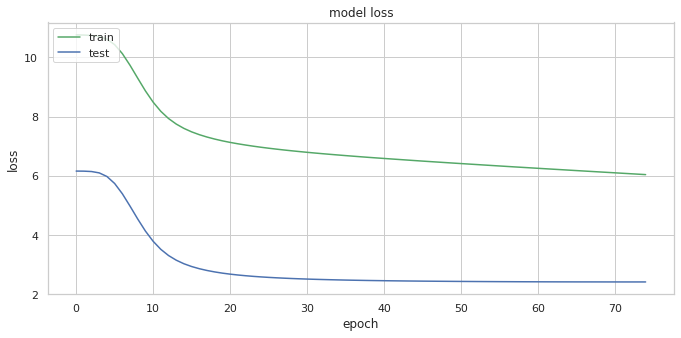

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

<a id="content5"></a>
## 5 ) Using a Neural Network

#### Now let us focus on the other main thing!!! Using a NN to matrix factorization.

1) Note that this way is not much different from the previous approach.

2) The main difference is that we have used Fully Connected layers as well as the Dropout layers and the BatchNormalization layers.

3) The number of units and the number of layers etc.. are the hyperparametrs here as in a traditional neural network.



## 5.1 ) Creating the Embeddings

####  Note that I have used 50 latent factors as that seems to give reasonable performance. Furhter tuning and careful optimization can give even better results.

In [ ]:
n_latent_factors=64
n_taxons=len(df_count['taxon_id'].unique())
n_users=len(df_count['user_id'].unique())

In [ ]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

In [ ]:
taxon_input=Input(shape=(1,),name='taxon_input',dtype='int64')
taxon_embedding=Embedding(n_taxons,n_latent_factors,name='taxon_embedding')(taxon_input)
taxon_vec=Flatten(name='FlattenTaxons')(taxon_embedding)
taxon_vec=Dropout(0.40)(taxon_vec)

In [ ]:
sim=dot([user_vec,taxon_vec],name='Simalarity-Dot-Product',axes=1)

## 5.2 ) Specifying the Model architecture

In [ ]:
nn_inp=Dense(96,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
# nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(96,activation='relu')(nn_inp)
nn_inp=Dropout(0.4)(nn_inp)
nn_inp=Dense(96,activation='relu')(nn_inp)
nn_model =keras.models.Model([user_input, taxon_input],nn_inp)
nn_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
taxon_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 64)        201280      user_input[0][0]                 
__________________________________________________________________________________________________
taxon_embedding (Embedding)     (None, 1, 64)        721664      taxon_input[0][0]                
____________________________________________________________________________________________

#### Notice the summary of the model and also the architecture of the model which u can tune of course.

## 5.3 ) Compiling the Model

In [ ]:
nn_model.compile(optimizer=Adam(lr=1e-3),loss='mse')

In [ ]:
batch_size=128
epochs=75

In [ ]:
nn_model.layers

In [ ]:
nn_model.layers[3].get_weights()

[array([[ 0.0220336 , -0.0180788 , -0.02295404, ..., -0.01822554,
         -0.01283438, -0.02260751],
        [-0.00419343,  0.00703074,  0.00802727, ...,  0.02633319,
          0.04739692, -0.02642432],
        [ 0.04697077,  0.04034426, -0.00283227, ...,  0.03234856,
         -0.04072899, -0.01721198],
        ...,
        [ 0.03005776, -0.00816023, -0.04890337, ...,  0.00893538,
          0.0450325 ,  0.04534951],
        [ 0.02483392, -0.00826072,  0.04796963, ...,  0.03056412,
         -0.00847201,  0.04667958],
        [ 0.02876283, -0.00150242, -0.03537656, ...,  0.0249346 ,
          0.0205992 , -0.00105589]], dtype=float32)]

## 5. 4) Fitting on Training set & Validating on Validation Set.

In [ ]:
History = nn_model.fit([train.user_id,train.taxon_id],train.counts, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.user_id,valid.taxon_id],valid.counts),
                              verbose = 1)

Epoch 1/75
882/882 [==============================] - 12s 13ms/step - loss: 7.1760 - val_loss: 3.1018
Epoch 2/75
882/882 [==============================] - 11s 12ms/step - loss: 5.9413 - val_loss: 2.7729
Epoch 3/75
882/882 [==============================] - 11s 13ms/step - loss: 5.8269 - val_loss: 2.5541
Epoch 4/75
882/882 [==============================] - 11s 13ms/step - loss: 8.8691 - val_loss: 2.5179
Epoch 5/75
882/882 [==============================] - 11s 13ms/step - loss: 5.7321 - val_loss: 2.4871
Epoch 6/75
882/882 [==============================] - 11s 13ms/step - loss: 9.9795 - val_loss: 2.5264
Epoch 7/75
882/882 [==============================] - 11s 13ms/step - loss: 4.9904 - val_loss: 2.5446
Epoch 8/75
882/882 [==============================] - 11s 13ms/step - loss: 4.0087 - val_loss: 2.5581
Epoch 9/75
882/882 [==============================] - 11s 13ms/step - loss: 3.9674 - val_loss: 2.5930
Epoch 10/75
882/882 [==============================] - 12s 13ms/step - loss: 13.00

#### Note that the validation loss is close to 0.84 which is quite decent. Also note that it has decrreased from 1.26 in the case of normal Matrix Factorization to this value here.

####  Similary playing with no of latent factors,  other parameters in the model architecture can give to even better results!!!!!

## Predict

In [ ]:
from numpy import array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
keras.utils.plot_model(nn_model, show_shapes=True) 


NameError: ignored

In [ ]:
nn_model.summary()

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])

nn_model.evaluate([train.user_id,train.taxon_id],train.counts)

#Extract Movie embedding

In [ ]:
import collections

In [ ]:
taxon_model = keras.Model(inputs=taxon_input, outputs=taxon_vec)
TAXON_EMBEDDING_LIST = []
TAXON_EMBED_MAP = collections.defaultdict()

In [ ]:
UNIQUE_TAXON_IDS = df_count['taxon_id'].unique()

In [ ]:
UNIQUE_TAXON_IDS.max()

In [ ]:
for _id in UNIQUE_TAXON_IDS:
    emb = taxon_model.predict(np.array([_id]))
    val = list(emb.reshape(1,-1))[0]
    TAXON_EMBEDDING_LIST.insert(_id, val)
    # TAXON_EMBED_MAP[_id] = val

In [ ]:
# util_df_count.fillna(0)
# df['taxon_name'].isnull().values.any()
df['taxon_name'].fillna("NA_real")

In [ ]:
taxon_emb = pd.DataFrame(np.array(TAXON_EMBEDDING_LIST).reshape(len(TAXON_EMBEDDING_LIST),64))
taxon_emb['taxon_name'] = df['taxon_name'].unique()
taxon_emb = taxon_emb.set_index('taxon_name')

In [ ]:
taxon_emb

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE

In [ ]:
features = taxon_emb.loc[:, :]

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

projections_df = {
    'x':  projections[:,0],
    'y': projections[:,1],
    'taxon_name' : taxon_emb.index
        }


In [ ]:
len(projections_df['x']) == len(projections_df['taxon_name'])

In [ ]:
fig = px.scatter(
    projections_df, x='x', y='y'#, #,text = 'taxon_name',#,#top_movies_emb.index,
    #color='taxon_name', labels={'color': 'taxon_name'}
)
fig.show()

In [ ]:
fig = px.scatter(
    projections_df, x='x', y='y',text = 'taxon_name'#,#top_movies_emb.index,
    #color='taxon_name', labels={'color': 'taxon_name'}
)
fig.show()

# top

In [ ]:
top_n = 100

In [ ]:
top_movies = df.groupby('taxon_id')['user_id'].count().reset_index(name="reviews").sort_values(ascending=False, by="reviews").head(top_n).merge(df[['taxon_id', 'taxon_name']], on = "taxon_id")
top_movies
# top_taxons = df_count.sort_values(ascending=False, by="counts").head(25).merge(df[['taxon_id', 'taxon_name']], on = "taxon_id")

KeyError: ignored

In [ ]:
# intialise data of lists. 
top_taxons = pd.DataFrame({'taxon_name':top_movies['taxon_name'].unique(), 
        'taxon_id':top_movies['taxon_id'].unique()})

# top_taxons

In [ ]:
TAXON_EMBEDDING_LIST_TOP = list( TAXON_EMBEDDING_LIST[i] for i in top_taxons['taxon_id'] )
top_taxon_emb = pd.DataFrame(np.array(TAXON_EMBEDDING_LIST_TOP).reshape(len(TAXON_EMBEDDING_LIST_TOP),64))
top_taxon_emb['taxon_name'] = top_taxons['taxon_name']
top_taxon_emb = top_taxon_emb.set_index('taxon_name')
top_taxon_emb

In [ ]:
cos_dist = pdist(top_taxon_emb, 'cosine')


In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [ ]:
mergings = linkage(top_taxon_emb, method='average', metric = 'cosine')
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=7,
           labels = top_taxon_emb.index
           )
plt.title("method='average', metric = 'cosine'", fontsize=16)
# fig = plt.figure(figsize=(12, 18))
# plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.show()

clusts_cos = fcluster(mergings, t = 1.0)

In [ ]:
features = top_taxon_emb.loc[:, :]

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

projections_df = {'x':  projections[:,0],
        'y': projections[:,1],
         'title' : top_taxon_emb.index,
         'cluster' : clusts_cos
        }

fig = px.scatter(
    projections_df, x='x', y='y', text = 'title',#top_movies_emb.index,
    color='cluster', labels={'color': 'cluster'}
)
fig.show()

## UMAP


In [ ]:
from umap import UMAP
import plotly.express as px

features = top_taxon_emb.loc[:, :]

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    text = top_taxon_emb.index,
    color=clusts_cos, labels={'color': 'cluster'}
)

fig_2d.show()

In [ ]:
umap_3d = UMAP(n_components=3, init='random', random_state=0)
proj_3d = umap_3d.fit_transform(features)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    text = top_taxon_emb.index,
    color=clusts_cos, labels={'color': 'cluster'}
)
fig_3d.update_traces(marker_size=5)
fig_3d.show()

In [ ]:
len(taxon_emb.index)

In [ ]:
features = taxon_emb.loc[:, :].dropna()

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    # text = taxon_emb.index,
    # color=clusts_cos, labels={'color': 'cluster'}
)

fig_2d.show()

# hist


In [ ]:
import plotly.express as px
fig = px.histogram(df_count['counts'], x="counts", title='Histogram of taxon counts',)
fig.show()

In [ ]:
df_sum = df_count.groupby(['user_id','taxon_id']).agg({'counts': 'sum'})
# Change: groupby state_office and divide by sum
# df_pcts = df_sum.groupby(level=0).apply(lambda x:
#                                                  100 * x / float(x.sum()))
# df_pcts
df_sum = df_sum.reset_index().drop(columns=["taxon_id"]).groupby(['user_id']).agg({'counts': 'sum'})
fig = px.histogram(df_sum['counts'], x="counts", title='Histogram of user counts',nbins=5000)
fig.show()

In [ ]:
# df_sum
df_sum.loc[df_sum['counts'] >= 5]

# PCA

In [ ]:
index=list(df_count['user_id'].unique())
columns=list(df_count['taxon_id'].unique())
index=sorted(index)
columns=sorted(columns)
 
util_df_count=pd.pivot_table(data=df_count,values='counts',index='user_id',columns='taxon_id')

NameError: ignored

In [ ]:
util_df_count = util_df_count.fillna(0)
util_df_count.head()

NameError: ignored

### SCALE

In [ ]:
from sklearn.preprocessing import StandardScaler
# features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# # Separating out the features
# x = df.loc[:, features].values
# # Separating out the target
# y = df.loc[:,['target']].values
# # Standardizing the features
util_df_count_scaled = StandardScaler().fit_transform(util_df_count)
util_df_count_scaled

### LSA
https://stackoverflow.com/questions/34725726/is-it-possible-apply-pca-on-any-text-classification
https://scikit-learn.org/stable/modules/decomposition.html

In [ ]:
svd = TruncatedSVD(n_components=5, random_state=42)
data = svd.fit_transform(data) 

# PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(util_df_count_scaled)

NameError: ignored

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,335), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

In [ ]:
pca.explained_variance_ratio_.cumsum()[0:10]

In [ ]:
pca = PCA(n_components = 2 ,svd_solver='arpack')
pca.fit(util_df_count_scaled)
scores_pca = pca.transform(util_df_count_scaled)
scores_pca

In [ ]:
pca.explained_variance_ratio_

In [ ]:
principalDf = pd.DataFrame(data = scores_pca
             , columns = ['pc1', 'pc2'])
principalDf['user_id'] = principalDf.index
principalDf

## 2d color

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

im=np.array([[[0,30,250],[  255, 255,  255]],
             [[0, 0, 0], [ 250, 30, 0]]])

from scipy.ndimage.interpolation import zoom
zoomed=zoom(im,(128,128,1),order=1)

plt.subplot(121)
plt.imshow(im,interpolation='nearest')
plt.subplot(122)
plt.imshow(zoomed,interpolation='nearest')
plt.show()

In [ ]:
# This function was derived from code written by Andras Deak    
def color_square2(colors, size):
    tl, tr, bl, br = map(np.array, colors)
    m = size - 1
    x, y = np.mgrid[0:size, 0:size]
    x = x[..., None] / m
    y = y[..., None] / m
    data = np.floor(x*y*br + (1-x)*y*tr + x*(1-y)*bl + (1-x)*(1-y)*tl + 0.5)
    return Image.fromarray(np.array(data, dtype = 'uint8'), 'RGB')

# color_square = color_square1

tl = (255, 0, 0)
tr = (255, 255, 0)
bl = (0, 0, 255)
br = (0, 255, 0)

# tl = (108, 115, 111)
# tr = (239, 239, 192)
# bl = (124, 137, 129)
# br = (192, 192, 175)

colors = (tl, tr, bl, br)
size = 256
img = color_square2(colors, size)
img.show()

# GIS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
coor_df = sf_df[['latitude', 'longitude', 'id', 'user_login']]
coor_df = coor_df[coor_df['latitude'] < -110].dropna()
coor_df = coor_df.merge(unique_users, on = 'user_login')
# coor_df = coor_df.merge(principalDf, on = 'user_id')
coor_df

latitude  longitude        id    user_login  user_id
0      -122.076131  37.421869   5677489   gyrrlfalcon        0
1      -122.244887  37.349021   5695848   gyrrlfalcon        0
2      -122.244309  37.341228   5695852   gyrrlfalcon        0
3      -122.244383  37.341256   5695858   gyrrlfalcon        0
4      -122.244404  37.341243   5695863   gyrrlfalcon        0
...            ...        ...       ...           ...      ...
127942 -122.519030  38.351526  52759055  sec_research     1774
127943 -122.519030  38.351526  52759056  sec_research     1774
127944 -122.519030  38.351526  52759058  sec_research     1774
127945 -122.519030  38.351526  52759059  sec_research     1774
127946 -122.519030  38.351526  52760192  sec_research     1774

[127947 rows x 5 columns]

In [ ]:
coordinates = coor_df.drop(columns=['id', 'user_login', 'user_id']).to_numpy()
# coordinates = coor_df.to_numpy()

In [ ]:
# kmeans_kwargs = {
#     "init": "random",
#     "n_init": 10,
#     "max_iter": 300,
#     "random_state": 42,
# }

# # A list holds the SSE values for each k
# sse = []
# for k in range(20, 100):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(coordinates)
#     sse.append(kmeans.inertia_)

# plt.style.use("fivethirtyeight")
# plt.plot(range(20, 100), sse)
# plt.xticks(range(20, 100))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()

#### kmean

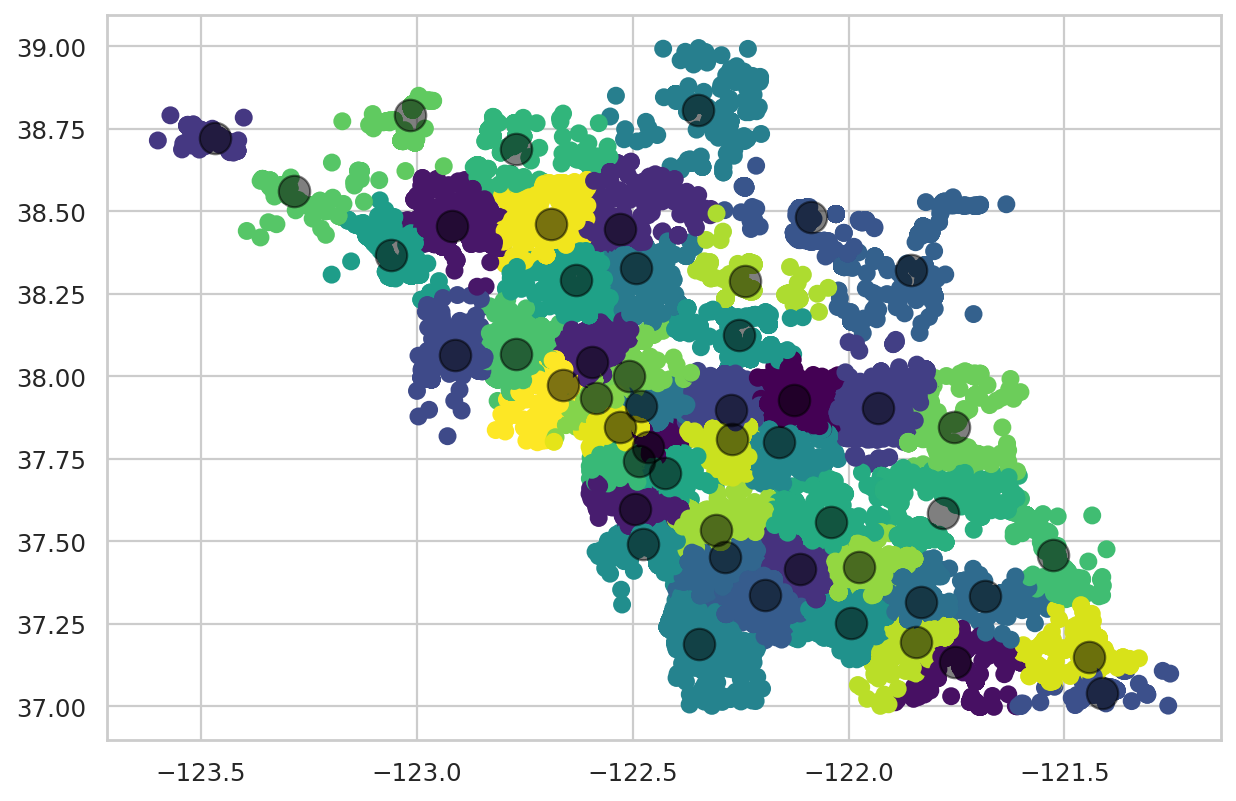

In [ ]:
#Train model
kmeans = KMeans(n_clusters=50)
kmeans.fit(coordinates)
#Plot clusters
figure(num=None, figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=kmeans.predict(coordinates), s=50, cmap='viridis')
centers = kmeans.cluster_centers_
# plt.xlim(min(coordinates[:,0]) - 10, -50)
plt.scatter(
centers[:, 0],
centers[:, 1],
c='black',
s=200,
alpha=0.5
);

In [ ]:
coor_df['cluster']=kmeans.predict(coordinates)

#### dbscan

No handles with labels found to put in legend.


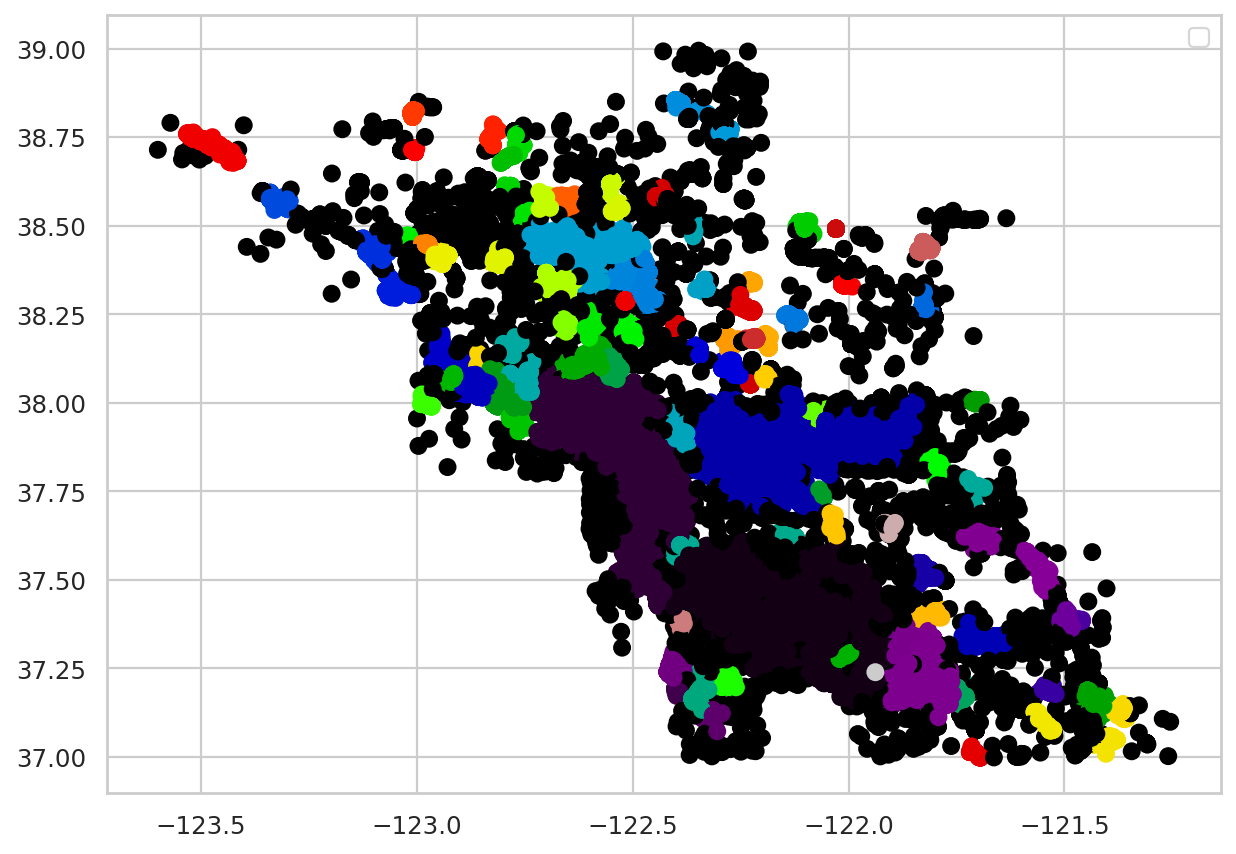

In [ ]:
clustering = DBSCAN(eps=1.5/6371., min_samples=50, algorithm='ball_tree', metric='haversine').fit(np.radians(coordinates))

figure(num=None, figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=clustering.labels_, s=50, cmap='nipy_spectral')
plt.legend() 
# centers = kmeans.cluster_centers_
# plt.xlim(min(coordinates[:,0]) - 10, -50)
# plt.scatter(
# centers[:, 0],
# centers[:, 1],
# c='black',
# s=200,
# alpha=0.5
# );

In [ ]:
import collections
collections.Counter(clustering.labels_)

Counter({-1: 4779,
         0: 22250,
         1: 49451,
         2: 244,
         3: 175,
         4: 211,
         5: 1097,
         6: 4602,
         7: 295,
         8: 131,
         9: 247,
         10: 166,
         11: 78,
         12: 108,
         13: 365,
         14: 20812,
         15: 710,
         16: 659,
         17: 196,
         18: 53,
         19: 233,
         20: 327,
         21: 245,
         22: 253,
         23: 350,
         24: 100,
         25: 841,
         26: 1068,
         27: 445,
         28: 57,
         29: 224,
         30: 5352,
         31: 107,
         32: 218,
         33: 102,
         34: 993,
         35: 424,
         36: 115,
         37: 81,
         38: 110,
         39: 543,
         40: 99,
         41: 146,
         42: 73,
         43: 630,
         44: 59,
         45: 375,
         46: 490,
         47: 374,
         48: 164,
         49: 91,
         50: 94,
         51: 211,
         52: 50,
         53: 103,
         54: 137,
 

In [ ]:
coor_df['cluster_scan']=clustering.labels_

## BASEmap

In [ ]:
# !pip install mpl_toolkits
# !pip install matplotlib-venn
# !pip install basemap
# !pip install Basemap
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
!brew install geos
!pip install https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap

/bin/bash: brew: command not found
     \ 149.2MB 1.3MB/s
     |████████████████████████████████| 6.5MB 3.9MB/s 
     |████████████████████████████████| 225kB 50.6MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759570 sha256=47de9fe108176e0543ca7d559df1e7fbc4fc288e9b4210558471e1ae035dd7e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-oe3la24x/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=70fcc1c8b2b1637bec9251ab2e388b204cc7bb107317465e532ecc8a945095b1
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built basemap pyshp


KeyError: ignored

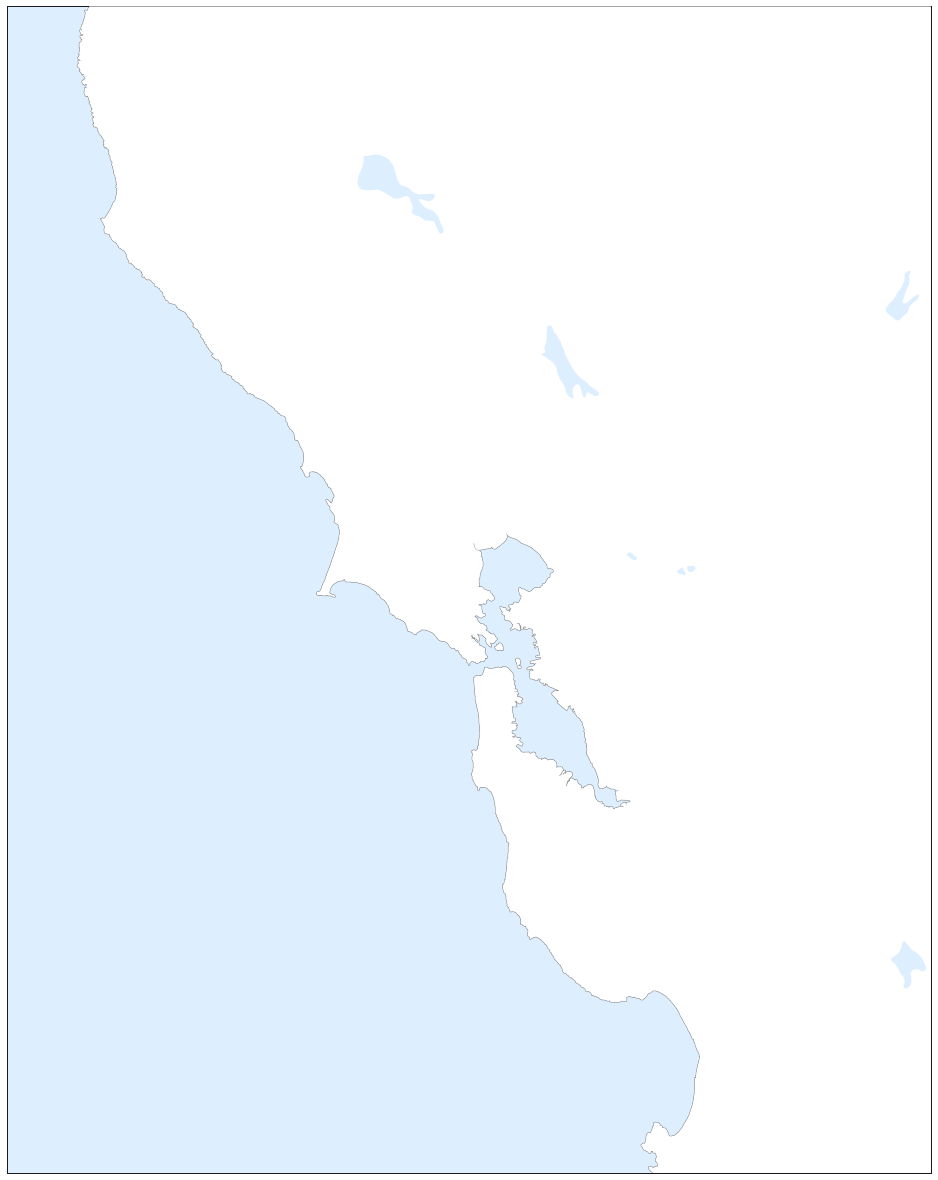

In [ ]:
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution=None,
#             width=8E6, height=8E6, 
#             lat_0=45, lon_0=-100,)
# m.etopo(scale=0.5, alpha=0.5)

# # Map (long, lat) to (x, y) for plotting
# x, y = m(-122.3, 47.6)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' Seattle', fontsize=12);
# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='merc', resolution='f', 
            lat_0=37.7749, lon_0=-122.4194,
            # width=2.5E5, height=3E5,
            llcrnrlon=-124.000, llcrnrlat= 36.5, urcrnrlon=-121.00, urcrnrlat=39.5, epsg = 7131)
# m.shadedrelief()
# m.bluemarble()
m.drawmapboundary(fill_color='#DDEEFF', zorder = 1)
m.fillcontinents(color="white", lake_color='#DDEEFF', zorder=5)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray' ,zorder=11)
m.drawstates(color='gray',zorder=11)
# m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 12000, verbose= True)
# m.arcgisimage(service='World_Physical_Map', xpixels = 12000, verbose= True)
# m.arcgisimage(service='USA_Topo_Maps', xpixels = 15000, verbose= True)

# 2. scatter citizen data
# and size reflecting area
m.scatter(coordinates[:, 0], coordinates[:, 1], latlon=True,
          # c=kmeans.predict(coordinates), 
          c = coor_df['pc1'],
          s=50,
          cmap='jet', alpha=0.3 ,zorder = 9)

# # 2.5 centers
# m.scatter(
#   centers[:, 0],
#   centers[:, 1],
#   c='black',
#   s=200,
#   alpha=0.5,
#   zorder = 10
# 

# 3. create colorbar and legend
# plt.colorbar(label='PC1 scores')
# plt.clim(3, 7)
# plt.legend()
c = plt.colorbar(orientation='vertical', shrink = 0.5)
c.set_label("PC1")

plt.title('K mean citizen science districts, San Francisco PC1')

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='merc', resolution='f', 
            lat_0=37.7749, lon_0=-122.4194,
            # width=2.5E5, height=3E5,
            llcrnrlon=-124.000, llcrnrlat= 36.5, urcrnrlon=-121.00, urcrnrlat=39.5, epsg = 7131)

m.drawmapboundary(fill_color='#DDEEFF', zorder = 1)
m.fillcontinents(color="white", lake_color='#DDEEFF', zorder=5)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray' ,zorder=11)
m.drawstates(color='gray',zorder=11)


m.scatter(coordinates[:, 0], coordinates[:, 1], latlon=True,
          # c=kmeans.predict(coordinates), 
          c = coor_df['pc2'],
          s=50,
          cmap='jet', alpha=0.3 ,zorder = 9)


c2 = plt.colorbar(orientation='vertical', shrink = 0.5)
c2.set_label("PC2")

plt.title('K mean citizen science districts, San Francisco PC2')

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='f', 
            lat_0=37.7749, lon_0=-122.4194,
            # width=2.5E5, height=3E5,
            llcrnrlon=-124.000, llcrnrlat= 36.5, urcrnrlon=-121.00, urcrnrlat=39.5, epsg = 7131)

m.drawmapboundary(fill_color='#DDEEFF', zorder = 1)
m.fillcontinents(color="white", lake_color='#DDEEFF', zorder=5)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray' ,zorder=11)
m.drawstates(color='gray',zorder=11)

sc1 = m.scatter(coordinates[:, 0], coordinates[:, 1], latlon=True,
          # c=kmeans.predict(coordinates), 
          c = coor_df['pc2'],
          s=50,
          cmap='viridis', alpha=0.2 ,zorder = 9)
sc2 = m.scatter(coordinates[:, 0], coordinates[:, 1], latlon=True,
          # c=kmeans.predict(coordinates), 
          c = coor_df['pc2'],
          s=50,
          cmap='plasma', alpha=0.2 ,zorder = 9)

c1 = plt.colorbar(orientation='vertical', shrink = 0.5, )
c1.set_label("PC1")
c2 = plt.colorbar(orientation='vertical', shrink = 0.5)
c2.set_label("PC2")

plt.title('K mean citizen science districts, San Francisco PC2, PC1')

## interactive

In [ ]:
!pip install geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mplleaflet
import mplleaflet as mpll

     |████████████████████████████████| 1.0MB 8.8MB/s 
     |████████████████████████████████| 6.5MB 25.6MB/s 
     |████████████████████████████████| 15.3MB 326kB/s 
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp37-none-any.whl size=28556 sha256=49ab57e01ffdcdc6cc0f9c7d5ee62d0bf89dee788a3c0dc85482ab7ef0aa2a7a
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
# mpll.display(fig=f,)
plt.scatter(coordinates[:1000, 0], coordinates[:1000, 1], c=kmeans.predict(coordinates)[:1000], s=50, cmap='viridis')
# mpll.show()
mpll.display(fig=f)

## Clustered point map

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
# lat_0=37.7749, lon_0=-122.4194
m = folium.Map(location=[37.77495, -122.4194], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)


In [ ]:

# Following this example: https://github.com/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

# Get x and y coordinates for each point
# points["x"] = points["geometry"].apply(lambda geom: geom.x)
# points["y"] = points["geometry"].apply(lambda geom: geom.y)

# Create a list of coordinate pairs
locations = list(zip(coordinates[:, 1], coordinates[:, 0]))

In [ ]:
# Create a folium marker cluster
marker_cluster = MarkerCluster(locations)

# Add marker cluster to map
marker_cluster.add_to(m)

In [ ]:
# Show map
m

In [ ]:
outfp = "/content/drive/MyDrive/Colab Notebooks/CS/map.html"
m.save(outfp)

# People

In [ ]:
sf_df_c = sf_df[sf_df['id'].isin(coor_df['id'])]
sf_df_c['cluster'] = coor_df['cluster']
sf_df_c.head()

captive                 created_at  ...   user_login cluster
0    False  2017-04-13T13:29:41-07:00  ...  gyrrlfalcon     7.0
1    False  2017-04-13T18:37:08-07:00  ...     paranger    14.0
2    False  2017-04-13T18:44:41-07:00  ...     paranger    14.0
3    False  2017-04-14T00:20:21-07:00  ...        kueda    14.0
4    False  2017-04-14T00:29:36-07:00  ...   damontighe    14.0

[5 rows x 39 columns]

In [ ]:
taxon_by_cluster = sf_df_c.groupby(['cluster', 'taxon_name'])['taxon_name'].count().reset_index(name="taxon_count").sort_values(ascending=False, by="taxon_count")
taxon_by_cluster

cluster                  taxon_name  taxon_count
3479       1.0                     Plantae          158
2996       1.0               Magnoliopsida          140
2381       1.0    Eschscholzia californica          137
13246     10.0                     Plantae          127
4137       1.0  Toxicodendron diversilobum           98
...        ...                         ...          ...
21206     19.0                   Melaleuca            1
21205     19.0    Megabalanus californicus            1
21203     19.0           Medicago lupulina            1
21201     19.0            Mecinus pyraster            1
24626     23.0       Hydrangea macrophylla            1

[49253 rows x 3 columns]

In [ ]:
taxon_by_cluster = taxon_by_cluster.groupby(['cluster', 'taxon_name']).agg({'taxon_count': 'sum'})
taxon_by_cluster = taxon_by_cluster.reset_index()
taxon_by_cluster
# cluster_pcts = taxon_by_cluster.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# cluster_pcts

cluster                  taxon_name  taxon_count
0          0.0           Abronia latifolia            1
1          0.0                      Acacia            3
2          0.0             Acacia dealbata            1
3          0.0          Acacia melanoxylon            2
4          0.0         Acalypha wilkesiana            1
...        ...                         ...          ...
49248     49.0      Zarhipis integripennis            1
49249     49.0            Zenaida macroura            3
49250     49.0      Zonotrichia leucophrys            1
49251     49.0  Zootermopsis angusticollis            1
49252     49.0                     Zostera            2

[49253 rows x 3 columns]

In [ ]:
# # taxon_by_cluster[taxon_by_cluster.groupby(['cluster'])['taxon_count'].transform(max) == taxon_by_cluster['taxon_count']]
# taxon_by_cluster_top3 = taxon_by_cluster.groupby('cluster')['taxon_count'].nlargest(3)
# taxon_by_cluster_top3 = taxon_by_cluster_top3.to_frame()
# taxon_by_cluster_top3
taxon_by_cluster_top3 = taxon_by_cluster.sort_values(by=['taxon_count'], ascending=False).groupby('cluster').head(10).reset_index(drop=True).sort_values(by=['cluster']).reset_index(drop=True)
taxon_by_cluster_top3

cluster                taxon_name  taxon_count
0        0.0              Angiospermae           25
1        0.0                   Plantae           33
2        0.0                     Fungi           20
3        0.0                      Iris           19
4        0.0             Magnoliopsida           19
..       ...                       ...          ...
495     49.0  Eschscholzia californica           28
496     49.0          Iris douglasiana           15
497     49.0      Diplacus aurantiacus           16
498     49.0             Magnoliopsida           30
499     49.0         Heracleum maximum           16

[500 rows x 3 columns]

In [ ]:
taxon_by_cluster_top3

cluster                taxon_name  taxon_count
0        0.0              Angiospermae           25
1        0.0                   Plantae           33
2        0.0                     Fungi           20
3        0.0                      Iris           19
4        0.0             Magnoliopsida           19
..       ...                       ...          ...
495     49.0  Eschscholzia californica           28
496     49.0          Iris douglasiana           15
497     49.0      Diplacus aurantiacus           16
498     49.0             Magnoliopsida           30
499     49.0         Heracleum maximum           16

[500 rows x 3 columns]

In [ ]:
# taxon_by_cluster_top3.drop( index = 0)
taxon_by_cluster_top3.columns = ['cluster', 'top_taxon_name', 'taxon_count']
# taxon_by_cluster_top3 = taxon_by_cluster_top3.to_frame()
# taxon_by_cluster_top3
taxon_by_cluster_top3 = taxon_by_cluster_top3.groupby('cluster')['top_taxon_name'].apply(' '.join).reset_index()
taxon_by_cluster_top3

cluster                                     top_taxon_name
0       0.0  Angiospermae Plantae Fungi Iris Magnoliopsida ...
1       1.0  Fungi Plantae Achillea millefolium Toxicodendr...
2       2.0  Magnoliopsida Claytonia perfoliata Toxicodendr...
3       3.0  Eschscholzia californica Arbutus menziesii Pse...
4       4.0  Rubus ursinus Fungi Magnoliopsida Lupinus Lupi...
5       5.0  Baccharis pilularis Poaceae Claytonia perfolia...
6       6.0  Iris douglasiana Lupinus Plantae Magnoliopsida...
7       7.0  Achillea millefolium Sisyrinchium bellum Plant...
8       8.0  Camellia Rubus armeniacus Rhododendron Sequoia...
9       9.0  Fungi Lysimachia arvensis Magnoliopsida Planta...
10     10.0  Diplacus aurantiacus Poaceae Achillea millefol...
11     11.0  Eschscholzia californica Plantae Baccharis pil...
12     12.0  Silybum marianum Brassicaceae Angiospermae Org...
13     13.0  Diplacus aurantiacus Plantae Magnoliopsida Iri...
14     14.0  Plantae Diptera Raphanus sativus Sisyrinchium ...
15     15.0  Plantae Coccinella septempunctata Claytonia pe...
16     16.0  Toxicodendron diversilobum Magnoliopsida Bacch...
17     17.0  Corvus brachyrhynchos Plantae Scrophularia cal...
18     18.0  Branta canadensis Eschscholzia californica Lep...
19     19.0  Toxicodendron diversilobum Magnoliopsida Dipla...
20     20.0  Sisyrinchium bellum Magnoliopsida Eschscholzia...
21     21.0  Prunus Haemorhous mexicanus Anas platyrhynchos...
22     22.0  Lysimachia arvensis Sisyrinchium bellum Matric...
23     23.0  Lysimachia arvensis Magnoliopsida Angiospermae...
24     24.0  Eschscholzia californica Angiospermae Plantae ...
25     25.0  Eschscholzia californica Sisyrinchium bellum C...
26     26.0  Melospiza melodia Rana boylii Eschscholzia cal...
27     27.0  Arbutus menziesii Achillea millefolium Briza m...
28     28.0  Armadillidium vulgare Calypte anna Quercus agr...
29     29.0  Plantae Toxicodendron diversilobum Diplacus au...
30     30.0  Plantae Galium aparine Coleoptera Heracleum ma...
31     31.0  Plantae Raphanus sativus Magnoliopsida Diplacu...
32     32.0  Briza maxima Quercus agrifolia Eschscholzia ca...
33     33.0  Sisyrinchium bellum Lupinus Euphydryas chalced...
34     34.0  Camissoniopsis cheiranthifolia Eschscholzia ca...
35     35.0  Scrophularia californica Magnoliopsida Clayton...
36     36.0  Plantae Angiospermae Lepidoptera Vicia sativa ...
37     37.0  Spilosoma vagans Poa douglasii Trifolium hirtu...
38     38.0  Anas platyrhynchos Sequoia sempervirens Clayto...
39     39.0  Iris douglasiana Asteraceae Claytonia perfolia...
40     40.0  Marah fabacea Eschscholzia californica Quercus...
41     41.0  Lupinus bicolor Plantae Diplacus aurantiacus T...
42     42.0  Eschscholzia californica Claytonia perfoliata ...
43     43.0  Trifolium Dichelostemma capitatum Sidalcea mal...
44     44.0  Toxicodendron diversilobum Quercus agrifolia D...
45     45.0  Achillea millefolium Plantae Sceloporus occide...
46     46.0  Achillea millefolium Magnoliopsida Plantae Sce...
47     47.0  Baccharis pilularis Fungi Quercus agrifolia Ma...
48     48.0  Foeniculum vulgare Sceloporus occidentalis Sis...
49     49.0  Marah fabacea Lupinus Claytonia perfoliata Ana...

In [ ]:
sf_df_c =sf_df_c.merge(taxon_by_cluster_top3[['cluster', 'top_taxon_name']] , on='cluster')

In [ ]:
sf_df_c2 = sf_df_c[['id', 'created_at', 'taxon_name', 'top_taxon_name', 'user_id']].dropna()

sf_df_c2['common_taxon'] = sf_df_c2.apply(lambda x: x.taxon_name in x.top_taxon_name, axis=1)
sf_df_c2

id                 created_at  ...  user_id common_taxon
0        5677489  2017-04-13T13:29:41-07:00  ...     8778        False
1        5693917  2017-04-14T11:02:53-07:00  ...    33742        False
2        5693938  2017-04-14T11:03:25-07:00  ...   398213        False
3        5694427  2017-04-14T11:24:01-07:00  ...   398213        False
4        5694438  2017-04-14T11:24:38-07:00  ...    33742        False
...          ...                        ...  ...      ...          ...
118470  43717649  2020-04-26T13:19:34-07:00  ...   540919        False
118471  43717746  2020-04-26T13:19:52-07:00  ...    23297        False
118472  43717792  2020-04-26T13:20:02-07:00  ...   333666        False
118473  43717823  2020-04-26T13:20:10-07:00  ...  1221242        False
118474  43717824  2020-04-26T13:20:10-07:00  ...    25480        False

[117961 rows x 6 columns]

In [ ]:
sf_df_c2

In [ ]:
common_taxons = sf_df_c2[['user_id', 'common_taxon', 'id']].groupby(['user_id','common_taxon']).count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
common_taxons

# fig = px.histogram(common_taxons['id'], x="counts", title='Histogram of users with common taxons',nbins=5000)
# fig.show()

In [ ]:
common_taxons

In [ ]:
import plotly.express as px
fig = px.histogram(common_taxons, x="id", color = 'common_taxon',
                   title='Histogram of users with common taxons for cluster',
                   marginal="violin", nbins=500,
                                    labels={
                     "id": "% of data",
                     "common_taxon": "taxon in top 10 in cluster",
                 })
fig.show()

In [ ]:
fig = px.histogram(common_taxons[common_taxons['common_taxon'] == True], 
                   x="id", title='Histogram of users with common taxons',
                   nbins=500, color = 'common_taxon', color_discrete_sequence=["red", "blue"],
                   labels={
                     "id": "% of data",
                     "common_taxon": "taxon in top 10 in cluster",
                 })
fig.show()

1. Hdbsacn
2. DRaw PCA as color
3. pair distance

## pair distance

In [ ]:
from scipy.cluster.hierarchy import fclusterdata

In [ ]:
coor_df

latitude  longitude        id    user_login  user_id  cluster
0      -122.076131  37.421869   5677489   gyrrlfalcon        0        7
1      -122.244887  37.349021   5695848   gyrrlfalcon        0       14
2      -122.244309  37.341228   5695852   gyrrlfalcon        0       14
3      -122.244383  37.341256   5695858   gyrrlfalcon        0       14
4      -122.244404  37.341243   5695863   gyrrlfalcon        0       14
...            ...        ...       ...           ...      ...      ...
127942 -122.519030  38.351526  52759055  sec_research     1774       20
127943 -122.519030  38.351526  52759056  sec_research     1774       20
127944 -122.519030  38.351526  52759058  sec_research     1774       20
127945 -122.519030  38.351526  52759059  sec_research     1774       20
127946 -122.519030  38.351526  52760192  sec_research     1774       20

[127947 rows x 6 columns]

### Single user

# New Section

In [ ]:
user_0 = coor_df[coor_df['user_id'].isin([1, 2])]
user_0

latitude  longitude        id user_login  user_id  cluster
1842 -122.180803  37.353703   5682279   paranger        1       14
1843 -122.180405  37.353050   5682371   paranger        1       14
1844 -122.179962  37.355745   5762889   paranger        1       14
1845 -122.108689  37.456880  11614604   paranger        1        7
1846 -122.107468  37.457532  11614729   paranger        1        7
...          ...        ...       ...        ...      ...      ...
2651 -122.137357  37.745233  43558526      kueda        2       23
2652 -122.136350  37.744830  43558531      kueda        2       23
2653 -122.137052  37.740510  43558534      kueda        2       23
2654 -122.130105  37.740115  43558538      kueda        2       23
2655 -122.130302  37.740243  43558544      kueda        2       23

[814 rows x 6 columns]

In [ ]:
# user_0[['latitude']]

user_0['d_clust'] = fclusterdata(X = np.column_stack((user_0[['latitude']], user_0[['longitude']])), t=0.05 ,criterion = 'distance')
user_0['d_clust']

1842    10
1843    10
1844    10
1845    11
1846    11
        ..
2651     1
2652     1
2653     1
2654     1
2655     1
Name: d_clust, Length: 814, dtype: int32

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 8))
# mpll.display(fig=f,)
plt.scatter(user_0['latitude'], user_0['longitude'], c=user_0['d_clust'], cmap='viridis')
# mpll.show()
mpll.display(fig=f)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
user_0['dbscan_clust'] = DBSCAN(eps=0.05, min_samples=3).fit_predict(
    np.column_stack((user_0[['latitude']], user_0[['longitude']])))

user_0

latitude  longitude        id  ... cluster  d_clust  dbscan_clust
1842 -122.180803  37.353703   5682279  ...      14       10             0
1843 -122.180405  37.353050   5682371  ...      14       10             0
1844 -122.179962  37.355745   5762889  ...      14       10             0
1845 -122.108689  37.456880  11614604  ...       7       11             1
1846 -122.107468  37.457532  11614729  ...       7       11             1
...          ...        ...       ...  ...     ...      ...           ...
2651 -122.137357  37.745233  43558526  ...      23        1            11
2652 -122.136350  37.744830  43558531  ...      23        1            11
2653 -122.137052  37.740510  43558534  ...      23        1            11
2654 -122.130105  37.740115  43558538  ...      23        1            11
2655 -122.130302  37.740243  43558544  ...      23        1            11

[814 rows x 8 columns]

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 8))
# mpll.display(fig=f,)
plt.scatter(user_0['latitude'], user_0['longitude'], c=user_0['dbscan_clust'], cmap='viridis')
# mpll.show()
mpll.display(fig=f)

### All users

In [ ]:
def fcluster_f(x):
  return fclusterdata(X = np.column_stack((x[['latitude']], x[['longitude']])), t=0.05 ,criterion = 'distance')

def dbscan_f(x):
  return DBSCAN(eps=0.05, min_samples=3).fit_predict(
    np.column_stack((x[['latitude']], x[['longitude']])))  

In [ ]:
user_clusters =  coor_df.groupby('user_id').apply(lambda x: fcluster_f(x))

In [ ]:
user_clusters_2 =  coor_df.groupby('user_id').apply(lambda x: dbscan_f(x))

In [ ]:
user_clusters_2 = pd.DataFrame(user_clusters_2, columns=['dbscan_clust']).explode('dbscan_clust').reset_index()
user_clusters_2

user_id dbscan_clust
0             0            0
1             0            1
2             0            1
3             0            1
4             0            1
...         ...          ...
127942     1774            0
127943     1774            0
127944     1774            0
127945     1774            0
127946     1774            0

[127947 rows x 2 columns]

In [ ]:
user_clusters = pd.DataFrame(user_clusters, columns=['d_clust']).explode('d_clust').reset_index()
user_clusters

user_id d_clust
0             0       9
1             0      10
2             0      10
3             0      10
4             0      10
...         ...     ...
127942     1774       1
127943     1774       1
127944     1774       1
127945     1774       1
127946     1774       1

[127947 rows x 2 columns]

### Something new?

In [ ]:
user_clusters_2.groupby(by='user_id').agg('max')

dbscan_clust
user_id              
0                  14
1                   1
2                   9
3                  22
4                   0
...               ...
1770                0
1771                0
1772                0
1773                1
1774                0

[1774 rows x 1 columns]

In [ ]:
fig = px.histogram(user_clusters.groupby(by='user_id').agg('max'), 
                   x="d_clust", title='Histogram of distance based clusters',
                  #  nbins=5000,# color = 'common_taxon', color_discrete_sequence=["red", "blue"],
                   labels={
                     "id": "% of data",
                     "common_taxon": "taxon in top 10 in cluster",
                 })
fig.show()

In [ ]:
coor_df['d_clust'] = user_clusters['d_clust']
coor_df

latitude  longitude        id    user_login  user_id  cluster d_clust
0      -122.076131  37.421869   5677489   gyrrlfalcon        0       49       9
1      -122.244887  37.349021   5695848   gyrrlfalcon        0       15      10
2      -122.244309  37.341228   5695852   gyrrlfalcon        0       15      10
3      -122.244383  37.341256   5695858   gyrrlfalcon        0       15      10
4      -122.244404  37.341243   5695863   gyrrlfalcon        0       15      10
...            ...        ...       ...           ...      ...      ...     ...
127942 -122.519030  38.351526  52759055  sec_research     1774       37       1
127943 -122.519030  38.351526  52759056  sec_research     1774       37       1
127944 -122.519030  38.351526  52759058  sec_research     1774       37       1
127945 -122.519030  38.351526  52759059  sec_research     1774       37       1
127946 -122.519030  38.351526  52760192  sec_research     1774       37       1

[127947 rows x 7 columns]

In [ ]:
cluster_center = coor_df.groupby(['user_id', 'd_clust']).agg(d_clust_lat = ('latitude', 'mean'),  d_clust_long = ('longitude', 'mean')).reset_index()
cluster_center

user_id  d_clust  d_clust_lat  d_clust_long
0           0        1  -121.480789     37.386180
1           0        2  -121.723147     37.705779
2           0        3  -121.638881     37.575854
3           0        4  -121.646600     37.766615
4           0        5  -122.307210     37.119207
...       ...      ...          ...           ...
4555     1772        2  -122.362393     37.465802
4556     1773        1  -123.352401     38.443816
4557     1773        2  -123.297891     38.577510
4558     1773        3  -123.244851     38.528592
4559     1774        1  -122.517807     38.350964

[4560 rows x 4 columns]

## points for users in clusters

In [ ]:
user_clusters_10 = user_clusters.groupby(by=['user_id' ,'d_clust']).size().reset_index(name='counts')
user_clusters_10 = user_clusters_10[user_clusters_10['counts']> 10]
user_clusters_10

user_id  d_clust  counts
0           0        1      26
2           0        3      95
4           0        5      14
5           0        6      25
6           0        7      30
...       ...      ...     ...
4551     1769        1      16
4552     1770        1      36
4554     1772        1      17
4557     1773        2      11
4559     1774        1      32

[2151 rows x 3 columns]

In [ ]:
user_clusters_10.groupby('user_id').size().reset_index(name = "n_clusters")

user_id  n_clusters
0           0          14
1           1           1
2           2           8
3           3          16
4           4           1
...       ...         ...
1512     1769           1
1513     1770           1
1514     1772           1
1515     1773           1
1516     1774           1

[1517 rows x 2 columns]

In [ ]:
fig = px.histogram(user_clusters_10.groupby('user_id').size().reset_index(name = "max_clusters"), 
                   x="max_clusters", title='Histogram of distance based clusters>10',
                  #  nbins=5000,# color = 'common_taxon', color_discrete_sequence=["red", "blue"],
                   labels={
                     "id": "% of data",
                     "common_taxon": "taxon in top 10 in cluster",
                 })
fig.show()

## cluster average

In [ ]:
user_1 = cluster_center[cluster_center['user_id'].isin(range(1, 10))]
user_1

user_id  d_clust  d_clust_lat  d_clust_long
20         1        1  -122.183762     37.360637
21         1        2  -122.109329     37.452517
22         1        3  -121.546919     37.186567
23         2        1  -122.136551     37.741819
24         2        2  -122.209542     37.746391
..       ...      ...          ...           ...
155        9       24  -122.121106     37.615778
156        9       25  -122.249256     37.562845
157        9       26  -122.386111     37.570057
158        9       27  -122.355545     38.505362
159        9       28  -122.117517     38.283267

[140 rows x 4 columns]

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 8))
# mpll.display(fig=f,)
plt.scatter(user_1['d_clust_lat'], user_1['d_clust_long'], c=user_1['user_id'], cmap='viridis')
# mpll.show()
mpll.display(fig=f)

### Time of a day

In [ ]:
coor_df

latitude  longitude        id    user_login  user_id  cluster d_clust
0      -122.076131  37.421869   5677489   gyrrlfalcon        0       49       9
1      -122.244887  37.349021   5695848   gyrrlfalcon        0       15      10
2      -122.244309  37.341228   5695852   gyrrlfalcon        0       15      10
3      -122.244383  37.341256   5695858   gyrrlfalcon        0       15      10
4      -122.244404  37.341243   5695863   gyrrlfalcon        0       15      10
...            ...        ...       ...           ...      ...      ...     ...
127942 -122.519030  38.351526  52759055  sec_research     1774       37       1
127943 -122.519030  38.351526  52759056  sec_research     1774       37       1
127944 -122.519030  38.351526  52759058  sec_research     1774       37       1
127945 -122.519030  38.351526  52759059  sec_research     1774       37       1
127946 -122.519030  38.351526  52760192  sec_research     1774       37       1

[127947 rows x 7 columns]

In [ ]:
coord_df_time = coor_df.merge(sf_df_c[['id', 'time_observed_at']])
# coord_df_time['time'] = coord_df_time['time_observed_at'][11:16]
coord_df_time['time'] = coord_df_time['time_observed_at'].str.extract(r'(20.*-)')
coord_df_time['time'] = coord_df_time['time'].str.replace(r'-$', '')
coord_df_time['time'] = pd.to_datetime(coord_df_time['time'])
coord_df_time['time'] = coord_df_time['time'].dt.hour
coord_df_time

latitude  longitude  ...           time_observed_at  time
0      -122.076131  37.421869  ...  2017-04-13T12:40:50-07:00  12.0
1      -122.244887  37.349021  ...  2017-04-14T08:07:31-07:00   8.0
2      -122.244309  37.341228  ...  2017-04-14T08:27:54-07:00   8.0
3      -122.244383  37.341256  ...  2017-04-14T08:28:53-07:00   8.0
4      -122.244404  37.341243  ...  2017-04-14T08:30:57-07:00   8.0
...            ...        ...  ...                        ...   ...
127942 -122.519030  38.351526  ...  2020-04-25T19:13:00-07:00  19.0
127943 -122.519030  38.351526  ...  2020-04-27T06:26:00-07:00   6.0
127944 -122.519030  38.351526  ...  2020-04-27T06:58:00-07:00   6.0
127945 -122.519030  38.351526  ...  2020-04-27T07:26:00-07:00   7.0
127946 -122.519030  38.351526  ...  2020-04-27T21:47:00-07:00  21.0

[127947 rows x 10 columns]

In [ ]:
# create a list of our conditions
conditions = [
    (coord_df_time['time'] >= 9) & (coord_df_time['time'] < 18) ,
    (coord_df_time['time'] < 9) | (coord_df_time['time'] >= 18)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
coord_df_time['period'] = np.select(conditions, values)

# display updated DataFrame
coord_df_time.head()

latitude  longitude       id  ...           time_observed_at  time  period
0 -122.076131  37.421869  5677489  ...  2017-04-13T12:40:50-07:00  12.0       1
1 -122.244887  37.349021  5695848  ...  2017-04-14T08:07:31-07:00   8.0       0
2 -122.244309  37.341228  5695852  ...  2017-04-14T08:27:54-07:00   8.0       0
3 -122.244383  37.341256  5695858  ...  2017-04-14T08:28:53-07:00   8.0       0
4 -122.244404  37.341243  5695863  ...  2017-04-14T08:30:57-07:00   8.0       0

[5 rows x 11 columns]

In [ ]:
user_2 = coord_df_time[coord_df_time['user_id']==6]
user_2

latitude  longitude        id  ...           time_observed_at  time  period
5792 -122.267266  37.933443   5686638  ...  2017-04-14T06:51:56-07:00   6.0       0
5793 -122.244012  37.905617   5687211  ...  2017-04-14T07:18:21-07:00   7.0       0
5794 -122.265542  37.790437   5709227  ...  2017-04-14T18:31:53-07:00  18.0       0
5795 -122.265488  37.790475   5709427  ...  2017-04-14T18:29:22-07:00  18.0       0
5796 -122.265450  37.790387   5709460  ...  2017-04-14T18:29:16-07:00  18.0       0
...          ...        ...       ...  ...                        ...   ...     ...
7097 -122.225367  37.885208  43845757  ...  2020-04-25T09:13:50-07:00   9.0       1
7098 -122.225308  37.885287  43845782  ...  2020-04-25T09:15:11-07:00   9.0       1
7099 -122.225428  37.885364  43845815  ...  2020-04-25T09:16:25-07:00   9.0       1
7100 -122.224967  37.885499  43845845  ...  2020-04-25T09:18:49-07:00   9.0       1
7101 -122.224736  37.885325  43845872  ...  2020-04-25T09:21:23-07:00   9.0       1

[1310 rows x 11 columns]

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 8))
# mpll.display(fig=f,)
plt.scatter(user_2['latitude'], user_2['longitude'], c=user_2['period'], cmap='viridis')
# mpll.show()
mpll.display(fig=f)

# heatmap

In [ ]:
import folium
import webbrowser
from folium.plugins import HeatMap

def generateBaseMap(default_location=[37.7749, -122.4194], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [ ]:
user_copy = coor_df[coor_df['user_id'].isin(range(1, 100))].copy()
user_copy['count'] = 1
user_copy['latitude'] = user_copy['latitude'].round(7).astype(float)
user_copy['longitude'] = user_copy['longitude'].round(7).astype(float)
user_copy = user_copy.dropna()

base_map = generateBaseMap()
heat_map = HeatMap(data=user_copy[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=3, max_zoom=13)
heat_map.add_to(base_map)

base_map

outfp = "/content/drive/MyDrive/Colab Notebooks/models/heatmap_map_2.html"
base_map.save(outfp)

In [ ]:
user_copy

latitude  longitude        id  ... cluster_scan  d_clust  count
1842  -122.180803  37.353703   5682279  ...            0        1      1
1843  -122.180405  37.353050   5682371  ...            0        1      1
1844  -122.179962  37.355745   5762889  ...            0        1      1
1845  -122.108689  37.456880  11614604  ...            0        2      1
1846  -122.107468  37.457532  11614729  ...            0        2      1
...           ...        ...       ...  ...          ...      ...    ...
40305 -122.738494  38.438425  44086703  ...           30        4      1
40306 -122.739100  38.438656  44086704  ...           30        4      1
40307 -122.739078  38.438619  44086707  ...           30        4      1
40308 -122.739094  38.438619  44086709  ...           30        4      1
40309 -122.739128  38.438567  44086711  ...           30        4      1

[38468 rows x 9 columns]

In [ ]:
heat_data = user_copy[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist()
heat_data

[[-123.3612133, 38.5921859, 1.0],
 [-123.3401417, 38.5761389, 1.0],
 [-123.3399417, 38.5762278, 1.0],
 [-123.3399111, 38.5764278, 1.0],
 [-123.3398806, 38.5764167, 1.0],
 [-123.3398667, 38.5764306, 1.0],
 [-123.3398444, 38.5763778, 1.0],
 [-123.3398361, 38.5764, 1.0],
 [-123.3398278, 38.5763361, 1.0],
 [-123.3398222, 38.576375, 1.0],
 [-123.3398056, 38.5760833, 1.0],
 [-123.3397972, 38.5760778, 1.0],
 [-123.3397917, 38.5764167, 1.0],
 [-123.3397361, 38.5760778, 1.0],
 [-123.339325, 38.5760472, 1.0],
 [-123.339225, 38.5762361, 1.0],
 [-123.338975, 38.5754861, 1.0],
 [-123.3387972, 38.5932361, 1.0],
 [-123.3387833, 38.5932417, 1.0],
 [-123.3387139, 38.5937111, 1.0],
 [-123.3385778, 38.5933306, 1.0],
 [-123.3382028, 38.5759389, 1.0],
 [-123.3380444, 38.5748472, 1.0],
 [-123.3380139, 38.5745694, 1.0],
 [-123.3380056, 38.5745583, 1.0],
 [-123.3379972, 38.574475, 1.0],
 [-123.3367, 38.5753361, 1.0],
 [-123.3364028, 38.5757306, 1.0],
 [-123.33635, 38.5757667, 3.0],
 [-123.33635, 38.5757722, 1

In [ ]:
user_copy[['latitude', 'longitude']].groupby(['latitude', 'longitude']).size().reset_index(name='counts')

latitude  longitude  counts
0      -123.36      38.59       1
1      -123.34      38.57       4
2      -123.34      38.58      25
3      -123.34      38.59       4
4      -123.33      38.58      16
...        ...        ...     ...
2454   -121.40      37.48       1
2455   -121.39      37.15       1
2456   -121.37      37.11       4
2457   -121.36      37.11      10
2458   -121.31      37.04       2

[2459 rows x 3 columns]

In [ ]:
locations = list(zip(user_copy["latitude"], user_copy["longitude"]))
locations

[(-122.1808033, 37.3537033),
 (-122.180405, 37.35305),
 (-122.1799617, 37.355745),
 (-122.1086889, 37.4568801),
 (-122.1074683, 37.4575321),
 (-122.1063612, 37.4596367),
 (-122.1064917, 37.4594917),
 (-122.1135639, 37.4407611),
 (-122.1134023, 37.4407982),
 (-122.1858667, 37.3629217),
 (-122.1854383, 37.362755),
 (-122.1854333, 37.36287),
 (-122.1866, 37.362555),
 (-122.1866383, 37.3625667),
 (-122.1865917, 37.3625917),
 (-122.1883867, 37.362545),
 (-122.185455, 37.3628417),
 (-121.5469191, 37.1865673),
 (-122.17807, 37.362125),
 (-122.177055, 37.3641083),
 (-122.1832117, 37.3594583),
 (-122.186519, 37.359712),
 (-122.3743439, 37.891121),
 (-121.8642337, 37.1755568),
 (-121.8642595, 37.1756081),
 (-121.8642609, 37.1756077),
 (-121.8642654, 37.1756081),
 (-121.8641657, 37.1756331),
 (-121.8642833, 37.1756471),
 (-121.864155, 37.1756549),
 (-121.8642394, 37.1756125),
 (-121.8641949, 37.1756424),
 (-121.8638987, 37.1759808),
 (-121.8639394, 37.1761317),
 (-121.8639718, 37.1760661),
 (-121

In [ ]:
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# nypd_data = pd.re   ad_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
#  nypd_robbery = nypd_data.loc[nypd_data['OFNS_DESC']=='ROBBERY']
my_heatmap = folium.Map(location=[37.7749, -122.4194], zoom_start=8)

heat_data = [[row['latitude'],row['longitude']] for index, row in user_copy.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(my_heatmap)

# Display the map
my_heatmap

# Felis catus

In [ ]:
cat_df = CS_df[['latitude', 'longitude', 'id', 'user_login', 'preferred_common_name' ,'taxon_name' ,'order']].dropna()
cat_df

latitude  longitude  ...              taxon_name            order
0      -122.076131  37.421869  ...            Cicadellidae        Hemiptera
1      -122.180803  37.353703  ...       Aquilegia formosa     Ranunculales
2      -122.180405  37.353050  ...       Aquilegia formosa     Ranunculales
3      -122.374344  37.891121  ...           Blastobasidae      Lepidoptera
5      -122.267851  37.845576  ...   Pholcus phalangioides          Araneae
...            ...        ...  ...                     ...              ...
139089 -122.313622  37.842117  ...  Zonotrichia leucophrys    Passeriformes
139090 -122.246751  37.458922  ...            Vireo gilvus    Passeriformes
139091 -122.419415  37.774929  ...           Passeriformes           Poales
139092 -122.400588  37.753566  ...           Dichelostemma      Asparagales
139093 -121.634954  37.323850  ...          Cathartes aura  Accipitriformes

[124326 rows x 7 columns]

In [ ]:
cat_df['catus'] = np.where(cat_df.order.str.contains("Carnivora"), 1, 0)
cat_df.groupby(by = 'catus').size()

catus
0    123908
1       418
dtype: int64

In [ ]:
cats = cat_df[cat_df['catus'] == 1]

f, ax = plt.subplots(1, figsize=(10, 10))
# mpll.display(fig=f,)
plt.scatter(cats['latitude'], cats['longitude'], s=50, cmap='viridis')
# mpll.show()
mpll.display(fig=f)

1. users with 10 > records
2. clusters at least 3 observations
3. draw users with 2-3 clusters

same distribution over cities
distance between cluster centres (for 2 clusters)

density plot for each cluster over time

profiles

user level info average (mode) time hours for clusters


## Export stuff

In [ ]:
user_clusters_2.to_csv(r'/content/drive/MyDrive/Colab Notebooks/CS/user_clusters_2.csv', index = False, header=True)

In [ ]:
coor_df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/CS/coord_df.csv', index = False, header=True)
